### MultiVariate Linear Regression with L1 Regularization

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [306]:
df=pd.read_csv("AdmissionDataset/data.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


**Drop the Serial No because it is irrelevant in prediction**

In [307]:
df.drop('Serial No.',axis=1,inplace=True)

In [308]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,317,103,2,2.5,2.0,8.15,0,0.65
1,319,108,3,3.0,3.5,8.54,1,0.71
2,322,110,3,3.5,2.5,8.67,1,0.80
3,326,113,5,4.5,4.0,9.40,1,0.91
4,319,106,3,3.5,2.5,8.33,1,0.74


In [309]:
training_data = df.sample(frac = 0.5, random_state = 200)
testing_data = df.drop(training_data.index)

### Feature Normalisation
${x_i}$= $\frac{x_i - \mu}{\sigma}$ 

Feature Normalisation is done because data in some columns is very small in comparison to other columns data.

#### Preparing the Training data

In [310]:
columns=training_data.shape[1]

X=training_data.iloc[:,0:columns-1]# features Sets

mu = X.mean()
sigma = X.std()

# features normalisation
X=(X-X.mean())/X.std()

Y=training_data.iloc[:,columns-1:columns] # outputSet
X.insert(0, 'Ones', 1)

print(Y.shape)
print(X.shape)
X.head()

(225, 1)
(225, 8)


,Ones,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
198,1,-0.133495,-0.996716,-0.116781,0.186073,1.167169,0.923817,-1.085911
39,1,-0.393176,-0.346684,-0.992637,-0.822758,-0.460598,-0.770867,-1.085911
215,1,-0.739417,0.465856,-0.116781,0.186073,-0.460598,-0.972215,0.916793
303,1,-0.393176,0.140840,-0.116781,0.186073,-0.460598,-0.082926,-1.085911
377,1,0.385866,0.303348,0.759075,0.690489,0.624580,0.168760,0.916793


> Convert the X and Y into numpy matrix because we are going to do the vectorised Implementation

In [311]:
X_train = np.matrix(X.values)
Y_train = np.matrix(Y.values)
print(X_train.shape)
print(Y_train.shape)



(225, 8)
(225, 1)


#### Preparing the validation/Test data

In [312]:
columns=testing_data.shape[1]

X=testing_data.iloc[:,0:columns-1]# features Sets

Y=testing_data.iloc[:,columns-1:columns] # outputSet

# features normalisation
X=(X-mu)/sigma


X.insert(0, 'Ones', 1)

X_test = np.matrix(X.values)
Y_test = np.matrix(Y.values)

print(X_test.shape)
print(Y_test.shape)

X.head()

(225, 8)
(225, 1)


,Ones,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,0.039625,-0.671700,-0.992637,-0.822758,-1.545776,-0.720530,-1.085911
1,1,0.212746,0.140840,-0.116781,-0.318342,0.081991,-0.066147,0.916793
2,1,0.472427,0.465856,-0.116781,0.186073,-1.003187,0.151981,0.916793
3,1,0.818668,0.953381,1.634931,1.194904,0.624580,1.376851,0.916793
5,1,-1.258779,-0.834208,-0.116781,0.186073,1.709758,-0.418507,-1.085911


#### Mean Square Error with  L1 Regularization
${J(\theta)}$=${\frac{1}{2m}}{\sum_{i=0}^{m}}$(${\hat{y_i}-{y_i})^2 +  \frac{\lambda}{m}*\parallel \theta \parallel}$ 


J: is cost function


m : no. of training examples

${\theta}$: parameters

In [391]:
def costCompute_L2(X,Y,theta,lambd):
    j=0.0
    m=X.shape[0]
    
    err = np.power((np.dot(X,theta.T)-Y),2)
    j=np.sum(err)/(2*m)
    reg= (lambd/m)*np.sum(theta)
    
    return j+reg

#### Gradient Descent algo
repeat Untill Converges{


${{\theta_j} :=}{{\theta_j}}$-${\alpha}$*${\frac{\partial}{\partial {\theta_j}} J(\theta)}$


}

${\alpha}$: Learning rate constant

In [392]:
#Vectorised Implementation
def gradientDescent(X, y, theta, alpha, iters,lambd):
    
    Jhistory=np.zeros(iters)
    ThetaforCoffiecients=np.zeros((iters,theta.shape[1]))
    reg_theta=theta
    
    
    m=X.shape[0]
    for i in range(iters):
        
        
        pre = np.dot(X,theta.T)-y
        reg_theta[theta>=0]=1
        reg_theta[theta<0]=-1
        
        temp=theta[0,0]-(alpha/m)*np.sum(pre)
        
        delta=np.dot(np.transpose(pre),X)
        theta=theta-(alpha/m)*(delta+lambd*reg_theta)
        
        theta[0,0]=temp
        
        ThetaforCoffiecients[i]=theta
        Jhistory[i] = costCompute_L2(X, y, theta,lambd)
        
        
        

    return theta,Jhistory,ThetaforCoffiecients

In [397]:
alpha=.01
iters=1000
lambd=0.001

theta = np.matrix(np.random.randn(1,X_train.shape[1]))

print(theta.shape)

minTheta, cost,Big= gradientDescent(X_train, Y_train, theta, alpha, iters,lambd)

print(minTheta.shape)
print(minTheta)

(1, 8)
(1, 8)
[[ 0.71770376 -0.15631981  0.24648133  0.00805682 -0.02874169  0.04696488
   0.00633151  0.04137513]]


Text(0.5, 1.0, 'Visualisation of change in Cost w.r.t to iterations')

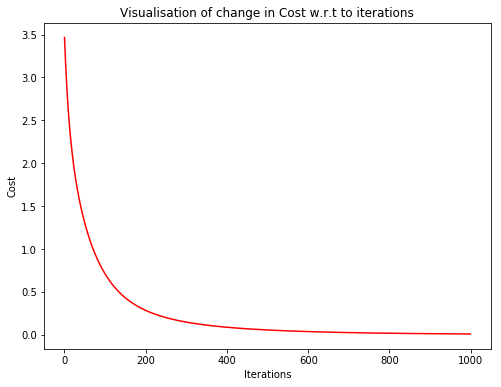

In [398]:
ig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Visualisation of change in Cost w.r.t to iterations')    

In [399]:
def prediction_Error(X,Y,finalParameter):
    out= np.dot(X,finalParameter.T)
    
   
    err= np.sum(np.square(out-Y))/X.shape[0]
    
    return err
    

In [400]:
prediction_Error(X_train,Y_train,minTheta)

0.01935718891430835

In [385]:
choice_lambda=[2,2.5,3,4,5,6,7,8,10,15,20,24,30,35,40]

err_train=[]
err_test=[]
Big_minTheta=np.zeros((len(choice_lambda),theta.shape[1]))
count=0
alpha=.009
iters=1000
for l in choice_lambda:
    theta = np.matrix(np.random.randn(1,X_train.shape[1]))*0.01  ## initialisation of theta
    
    ##training 
    minTheta,_,_= gradientDescent(X_train, Y_train, theta, alpha, iters,l)
    Big_minTheta[count]=minTheta
    count+=1
    err1=prediction_Error(X_train,Y_train,minTheta)
    err2=prediction_Error(X_test,Y_test,minTheta)
    err_train.append(err1)
    err_test.append(err2)

Text(0.5, 1.0, 'Training Error vs Reg. Parameter')

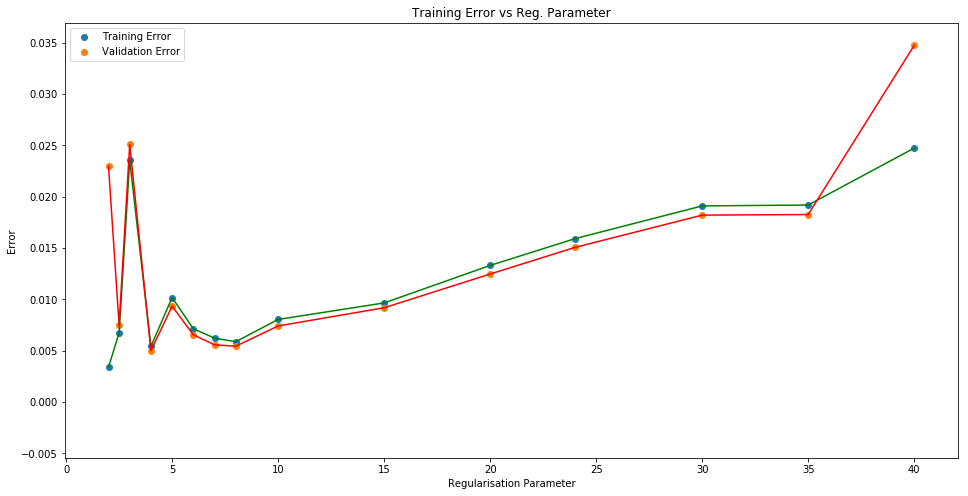

In [389]:
plt.rcParams['figure.figsize'] = [16, 8]
plt.scatter(choice_lambda,err_train,label="Training Error")
plt.plot(choice_lambda,err_train,'g')
plt.scatter(choice_lambda,err_test,label="Validation Error")
plt.plot(choice_lambda,err_test,'r')

plt.legend()

plt.xlabel('Regularisation Parameter')
plt.ylabel('Error')
plt.title('Training Error vs Reg. Parameter')

In [381]:
print(err_train)
print(err_test)

[0.0034, 0.03197988254378563, 0.010329689416233315, 0.01410211740992599, 0.019527486343181653, 0.008122483367915425, 0.008979873134897887, 0.005602240183547805, 0.005569479961146123, 0.009728652618631307, 0.013272604198456666, 0.01685863087736829, 0.019086431953475567, 0.019599643931030548, 0.02474122514714621]
[0.0233011252739232, 0.03440865155769689, 0.013038601742576306, 0.01545806652707495, 0.019787851528238153, 0.007554057701783868, 0.009682348846871755, 0.005167075352641173, 0.005605741096150116, 0.009171057048024506, 0.012548500893088083, 0.01601266826310364, 0.018208856837145727, 0.018706638931316816, 0.03474122514714621]


**Observations**:

<font color="purple" size="3">
<ul>
    <li>  The value of $\lambda$ is a hyperparameter that you can tune using a validation set.</li>
 <li>    If ${\lambda}$ value is too small then it might leads to the overfit(high variance) which leads to high error on validation dataset and low error on train datasets.</li>
<li>If ${\lambda}$ value is too large then it leads to the underfit(high bias) which leads to high error on validation dataset and high error on train datasets.</li>
    </ul>
</font


#### Part4

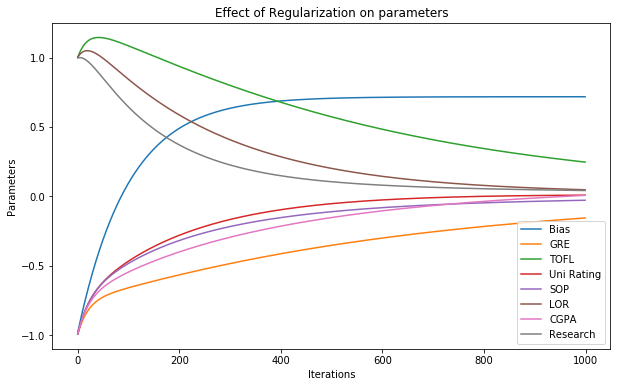

In [401]:
plt.rcParams['figure.figsize'] = [10, 6]
l1=Big[:,0]
l2=Big[:,1]
l3=Big[:,2]
l4=Big[:,3]
l5=Big[:,4]
l6=Big[:,5]
l7=Big[:,6]
l8=Big[:,7]

it=range(0,iters)
plt.plot(it,list(l1),label="Bias")
plt.plot(it,list(l2),label="GRE")
plt.plot(it,list(l3),label="TOFL")

plt.plot(it,list(l4),label="Uni Rating")
plt.plot(it,list(l5),label="SOP")
plt.plot(it,list(l6),label="LOR")
plt.plot(it,list(l7),label="CGPA")
plt.plot(it,list(l8),label="Research")

plt.xlabel("Iterations")
plt.ylabel("Parameters")
plt.title("Effect of Regularization on parameters")
plt.legend()
plt.show()

In [232]:
# plt.rcParams['figure.figsize'] = [10, 6]
# l1=Big_minTheta[:,0]
# l2=Big_minTheta[:,1]
# l3=Big_minTheta[:,2]
# l4=Big_minTheta[:,3]
# l5=Big_minTheta[:,4]
# l6=Big_minTheta[:,5]
# l7=Big_minTheta[:,6]
# l8=Big_minTheta[:,7]

# #it=range(0,len(choice_lambda)
# plt.plot(choice_lambda,list(l1),label="Bias")
# plt.plot(choice_lambda,list(l2),label="GRE")
# plt.plot(choice_lambda,list(l3),label="TOFL")

# plt.plot(choice_lambda,list(l4),label="Uni Rating")
# plt.plot(choice_lambda,list(l5),label="SOP")
# plt.plot(choice_lambda,list(l6),label="LOR")
# plt.plot(choice_lambda,list(l7),label="CGPA")
# plt.plot(choice_lambda,list(l8),label="Research")

# plt.xlabel("LAMBDA")
# plt.ylabel("Coefficients")
# plt.title("behaviour of the coefficients")
# plt.legend()
# plt.show()